In [1]:
import os
import similaritymeasures
import numpy as np
import cv2
from matplotlib import pyplot as plt

import seaborn as sns

import pandas as pd

In [110]:
def get_scores(val_data_path, val_run_path, save_loc):
    os.makedirs(save_loc,exist_ok=True)
    frechet_dists = []
    euclidean_dists = []
    for episode in range(25):
        episode = str(episode)
        filename = os.path.join(val_run_path,episode,'vehicle_positions.txt')
        with open(filename,'r') as f:
            positions = f.readlines()
        run_traj = np.array([ [ float(t.strip()) for t in x.strip().split(',')] for x in positions])

        filename = os.path.join(val_data_path,episode,'vehicle_positions.txt')
        with open(filename,'r') as f:
            positions = f.readlines()
        data_traj = np.array([ [ float(t.strip()) for t in x.strip().split(',')] for x in positions])

        filename = os.path.join(val_run_path,episode,'command.txt')
        with open(filename,'r') as f:
            command = f.readline().strip()

        plt.plot(data_traj[:,0],data_traj[:,1],label='Ground Truth')
        plt.plot(run_traj[:,0],run_traj[:,1],label='Inference on Prediction')
        plt.scatter(data_traj[-1,0],data_traj[-1,1],s=100,label='Ground Truth - End Point')
        plt.scatter(run_traj[-1,0],run_traj[-1,1],s=100,label='Inference - End Point')
        plt.scatter(data_traj[0,0],data_traj[0,1],s=100,label='Starting Point')

        x_min = np.min(np.hstack([data_traj[:,0],run_traj[:,0]]))
        y_min = np.min(np.hstack([data_traj[:,1],run_traj[:,1]]))

        x_max = np.max(np.hstack([data_traj[:,0],run_traj[:,0]]))
        y_max = np.max(np.hstack([data_traj[:,1],run_traj[:,1]]))

        frechet_dists.append(similaritymeasures.frechet_dist(run_traj,data_traj))

        euclidean_dists.append(similaritymeasures.distance.euclidean(data_traj[-1,:],run_traj[-1,:]))
        
        size = max(x_max-x_min+30,y_max-y_min+30)
        if x_max-x_min>y_max-y_min:
            excess_size = size-(y_max-y_min)
            excess_size/=2
            plt.xlim(x_min-15, x_max+15)
            plt.ylim(y_min-excess_size, y_max+excess_size)
        else:
            excess_size = size-(x_max-x_min)
            excess_size/=2
            plt.xlim(x_min-excess_size, x_max+excess_size)
            plt.ylim(y_min-15, y_max+15)
        plt.gca().invert_xaxis()
        plt.gca().set_aspect('equal')
#         plt.axis('off')
        plt.title(command)

#         plt.legend()
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=2)
        print(f'Episode {episode}: {command}')
        print(f'Frechet Distance: {frechet_dists[-1]}')
        print(f'Euclidean Distance between End Points: {euclidean_dists[-1]}')
    #     print(f'Curve Length Measure: {cl_measures[-1]}')
        plt.savefig(os.path.join(save_loc,episode)+'.png')    
        plt.show()
    return frechet_dists, euclidean_dists

In [28]:
# ! scp varunc@ada:/share3/varunc/val_runs.zip /ssd_scratch/cvit/varunc
# ! unzip /ssd_scratch/cvit/varunc/val_runs.zip
# ! scp varunc@ada:/share3/varunc/val_run_baseline.zip /ssd_scratch/cvit/varunc
# ! unzip /ssd_scratch/cvit/varunc/val_run_baseline.zip
# ! scp varunc@ada:/share3/varunc/val_convlstm.zip /ssd_scratch/cvit/varunc
# ! scp varunc@ada:/share3/varunc/val_framebyframe.zip /ssd_scratch/cvit/varunc
# ! scp varunc@ada:/share3/varunc/val_fbf2.zip /ssd_scratch/cvit/varunc
# ! scp varunc@ada:/share3/varunc/val_temp_convattn.zip /ssd_scratch/cvit/varunc
# ! scp varunc@ada:/share3/varunc/val_run_fbf_network2.zip /ssd_scratch/cvit/varunc
! scp varunc@ada:/share3/varunc/val_dual2_fbf_mask.zip /ssd_scratch/cvit/varunc
# unzip /ssd_scratch/cvit/varunc/val_convlstm.zip

val_dual2_fbf_mask.zip                        100% 8586KB   8.4MB/s   00:00    


scp varunc@ada:/share3/varunc/val_runs.zip /ssd_scratch/cvit/varunc
unzip /ssd_scratch/cvit/varunc/val_runs.zip
scp varunc@ada:/share3/varunc/val_run_baseline.zip /ssd_scratch/cvit/varunc
unzip /ssd_scratch/cvit/varunc/val_run_baseline.zip
scp varunc@ada:/share3/varunc/val_convlstm.zip /ssd_scratch/cvit/varunc
unzip /ssd_scratch/cvit/varunc/val_convlstm.zip
scp varunc@ada:/share3/varunc/val_framebyframe.zip /ssd_scratch/cvit/varunc
unzip /ssd_scratch/cvit/varunc/val_framebyframe.zip
scp varunc@ada:/share3/varunc/val_fbf2.zip /ssd_scratch/cvit/varunc
unzip /ssd_scratch/cvit/varunc/val_fbf2.zip
scp varunc@ada:/share3/varunc/val_temp_convattn.zip /ssd_scratch/cvit/varunc
unzip /ssd_scratch/cvit/varunc/val_temp_convattn.zip
scp varunc@ada:/share3/varunc/val_run_fbf_network2.zip /ssd_scratch/cvit/varunc
unzip /ssd_scratch/cvit/varunc/val_run_fbf_network2.zip

scp varunc@ada:/share3/varunc/val_dual_fgf_mask.zip /ssd_scratch/cvit/varunc
unzip /ssd_scratch/cvit/varunc/val_dual_fgf_mask.zip
scp varunc@ada:/share3/varunc/val_dual_fgf_trajectory.zip /ssd_scratch/cvit/varunc
unzip /ssd_scratch/cvit/varunc/val_dual_fgf_trajectory.zip


Episode 0: Go straight and stop before the traffic light.
Frechet Distance: 26.111845491426653
Euclidean Distance between End Points: 26.111845491426653


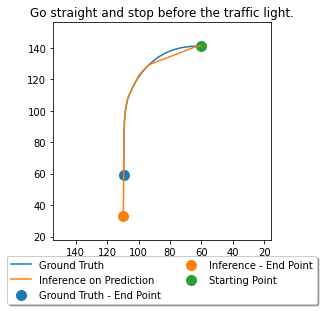

Episode 1: go straight and take a right
Frechet Distance: 6.409774368995845
Euclidean Distance between End Points: 6.409774368995845


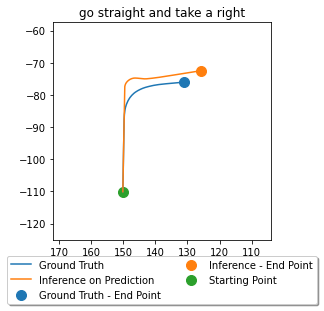

Episode 2: Shift to the left lane and stop at the intersection.
Frechet Distance: 12.082260518632788
Euclidean Distance between End Points: 12.082260518632788


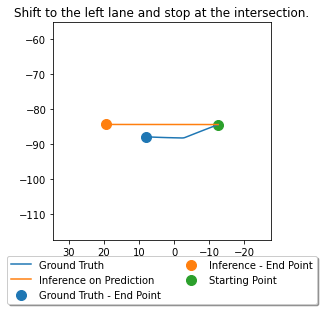

Episode 3: Stop after crossing the stop signboard
Frechet Distance: 2.7664610068414364
Euclidean Distance between End Points: 2.766461006841437


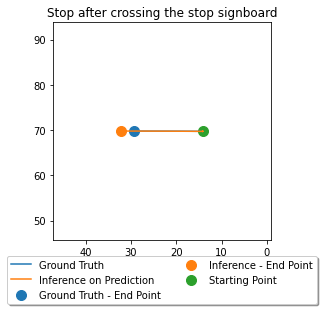

Episode 4: Park on the roadside after you have crossed the bus stop
Frechet Distance: 3.334854446656641
Euclidean Distance between End Points: 3.3348544466566405


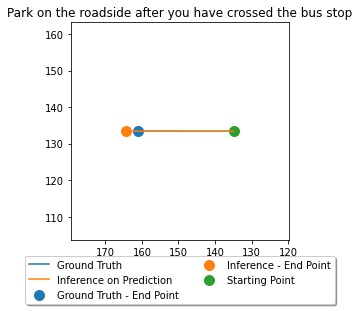

Episode 5: Take the next right turn.
Frechet Distance: 9.918604998670695
Euclidean Distance between End Points: 9.918604998670695


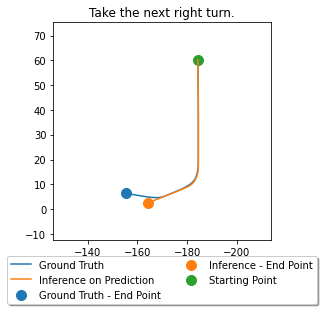

Episode 6: Stop in front of the garbage dumpsters.
Frechet Distance: 17.072058310386677
Euclidean Distance between End Points: 17.072058310386677


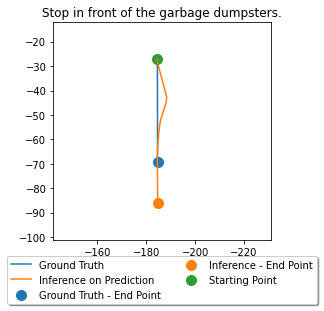

Episode 7: change to left lane
Frechet Distance: 11.234243026607567
Euclidean Distance between End Points: 11.234243026607567


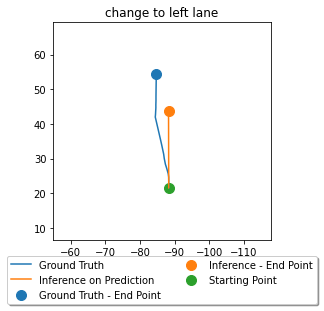

Episode 8: Go straight and stop a few metres ahead of the bus stop
Frechet Distance: 23.26119392554721
Euclidean Distance between End Points: 23.26119392554721


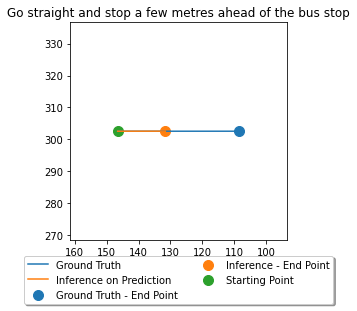

Episode 9: Stop near the signboard
Frechet Distance: 9.440485504095543
Euclidean Distance between End Points: 9.440485504095543


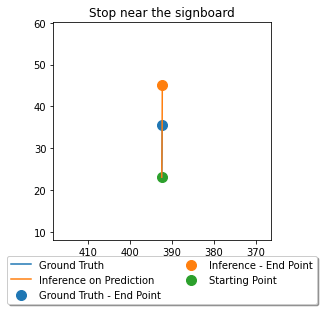

Episode 10: stop by the lamp post
Frechet Distance: 5.769687585316607
Euclidean Distance between End Points: 5.769687585316607


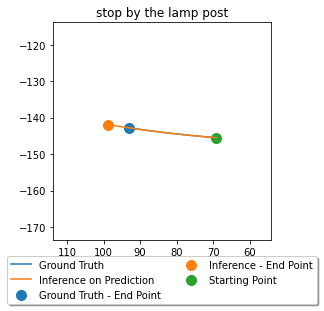

Episode 11: After crossing the blue car come to a stop
Frechet Distance: 2.2496643059118075
Euclidean Distance between End Points: 2.2496643059118075


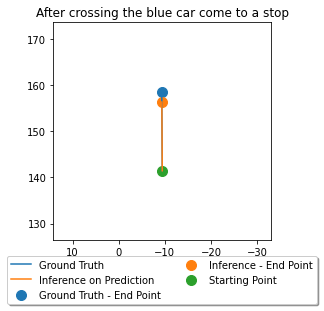

Episode 12: Drive straight till the intersection and then turn left
Frechet Distance: 13.804164257040698
Euclidean Distance between End Points: 13.804164257040698


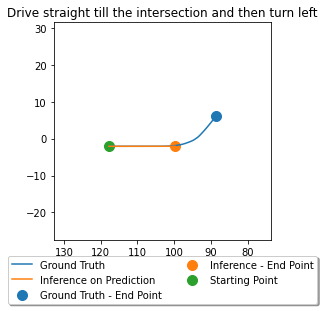

Episode 13: Drive to the corner and go right
Frechet Distance: 6.641624991224376
Euclidean Distance between End Points: 6.641624991224376


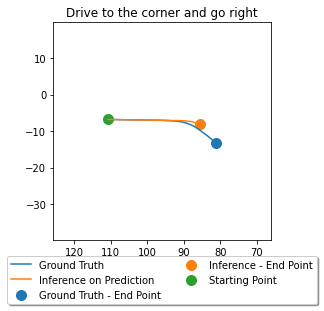

Episode 14: Turn right from the intersection.
Frechet Distance: 7.521698756749053
Euclidean Distance between End Points: 7.521698756749053


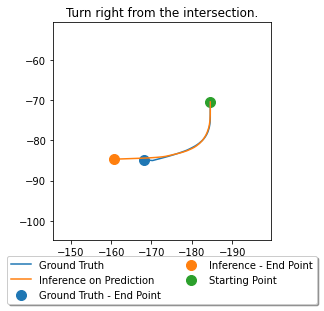

Episode 15: Stop near the red shelters
Frechet Distance: 16.376811999900273
Euclidean Distance between End Points: 16.376811999900273


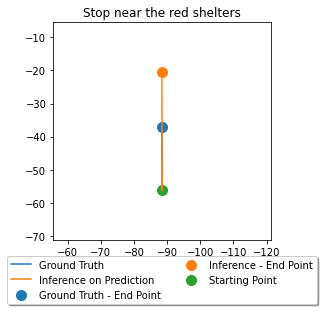

Episode 16: Drive straight till you see a red coloured board
Frechet Distance: 8.76290896626611
Euclidean Distance between End Points: 8.76290896626611


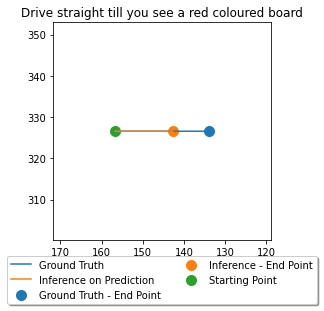

Episode 17: take right and stop near the speed limit sign
Frechet Distance: 14.540158873750967
Euclidean Distance between End Points: 14.540158873750967


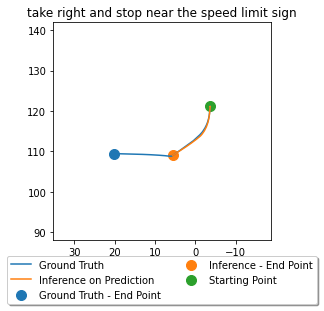

Episode 18: take a right turn and stop across the bench on left
Frechet Distance: 0.7166695875518984
Euclidean Distance between End Points: 0.7166695875518984


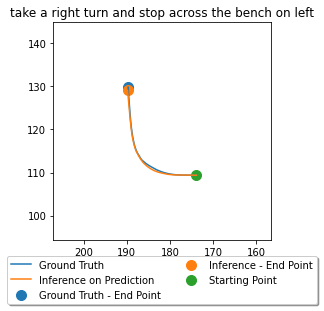

Episode 19: Stop before the next right turn.
Frechet Distance: 32.55587197896258
Euclidean Distance between End Points: 32.55587197896258


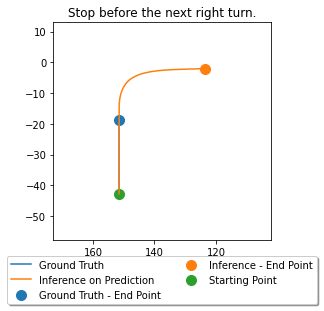

Episode 20: Park just ahead of the speed signboard
Frechet Distance: 8.583039742608017
Euclidean Distance between End Points: 8.583039742608017


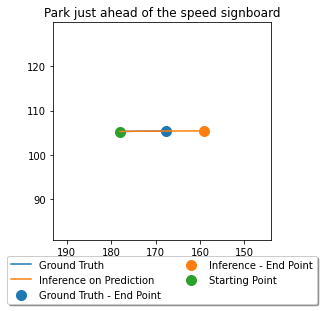

Episode 21: Turn right and stop near the bus stop.
Frechet Distance: 2.7446696386591745
Euclidean Distance between End Points: 2.7446696386591745


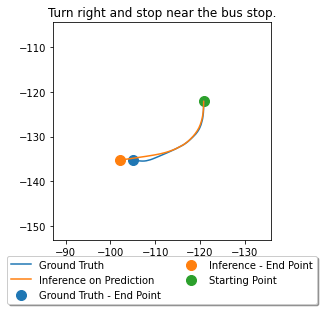

Episode 22: Wait at the traffic light then go straight.
Frechet Distance: 86.74084336381058
Euclidean Distance between End Points: 86.74084336381058


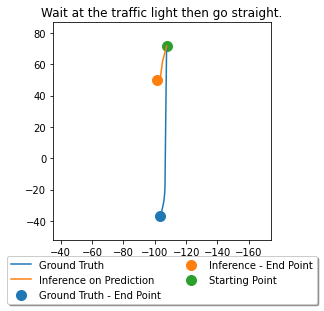

Episode 23: Turn right from the intersection
Frechet Distance: 1.1752202891395593
Euclidean Distance between End Points: 1.1752004228828945


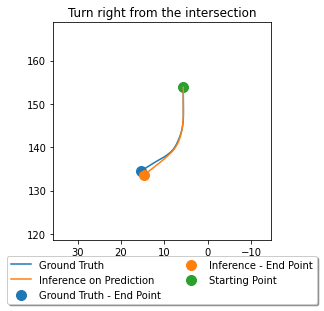

Episode 24: park immediately after the signboard
Frechet Distance: 3.2317066771617986
Euclidean Distance between End Points: 3.2317066771617986


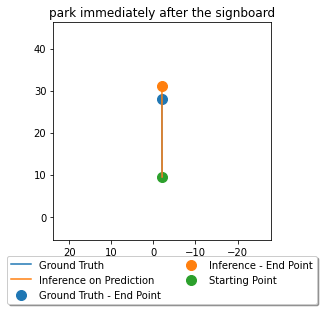

In [113]:
val_data_path = '/ssd_scratch/cvit/varunc/carla_data/val/'
val_run_path = '/ssd_scratch/cvit/varunc/val5_conv3d/'
save_loc = '../trajectories_conv3d/'

f_conv3d,e_conv3d = get_scores(val_data_path, val_run_path, save_loc)

Episode 0: Go straight and stop before the traffic light.
Frechet Distance: 90.59249842920809
Euclidean Distance between End Points: 90.59249842920809


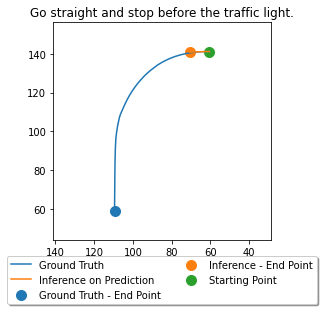

Episode 1: go straight and take a right
Frechet Distance: 6.593041440555822
Euclidean Distance between End Points: 6.593041440555822


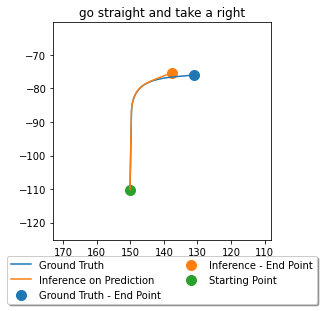

Episode 2: Shift to the left lane and stop at the intersection.
Frechet Distance: 110.20466395654934
Euclidean Distance between End Points: 110.20466395654935


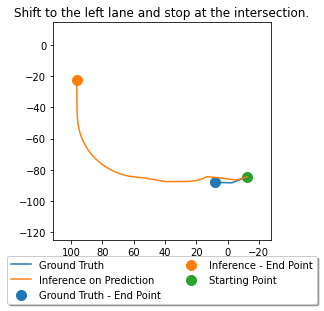

Episode 3: Stop after crossing the stop signboard
Frechet Distance: 8.748302839894835
Euclidean Distance between End Points: 8.748302839894835


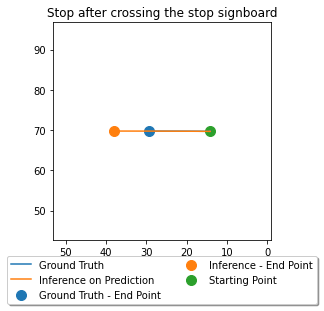

Episode 4: Park on the roadside after you have crossed the bus stop
Frechet Distance: 8.673508621547523
Euclidean Distance between End Points: 8.673508621547523


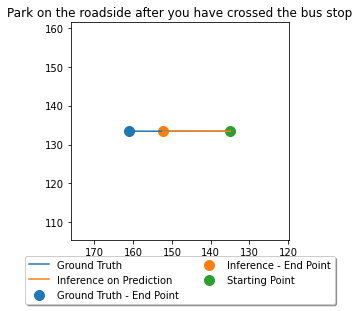

Episode 5: Take the next right turn.
Frechet Distance: 9.857383769447859
Euclidean Distance between End Points: 9.857383769447859


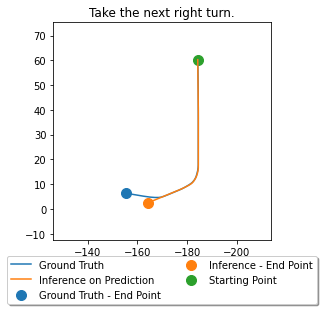

Episode 6: Stop in front of the garbage dumpsters.
Frechet Distance: 12.044128793338531
Euclidean Distance between End Points: 12.04412879333853


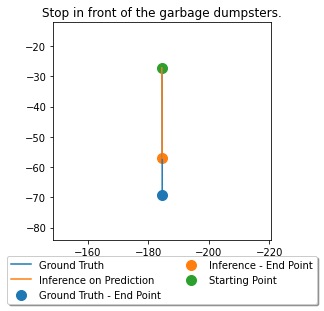

Episode 7: change to left lane
Frechet Distance: 111.26862644858433
Euclidean Distance between End Points: 97.93182110518646


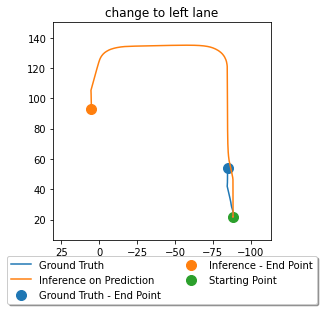

Episode 8: Go straight and stop a few metres ahead of the bus stop
Frechet Distance: 27.89035985656598
Euclidean Distance between End Points: 27.89035985656598


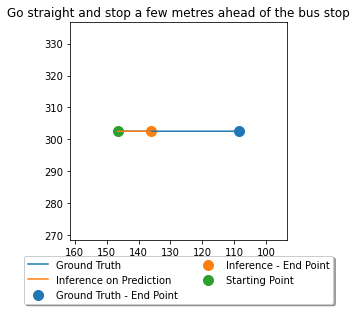

Episode 9: Stop near the signboard
Frechet Distance: 9.440485504095543
Euclidean Distance between End Points: 9.440485504095543


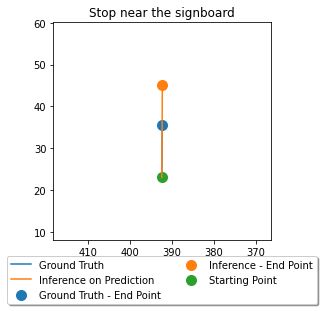

Episode 10: stop by the lamp post
Frechet Distance: 7.213482416101908
Euclidean Distance between End Points: 7.213482416101908


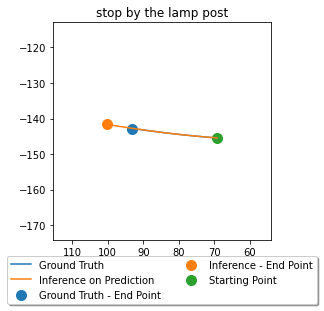

Episode 11: After crossing the blue car come to a stop
Frechet Distance: 2.950150073685143
Euclidean Distance between End Points: 2.950150073685143


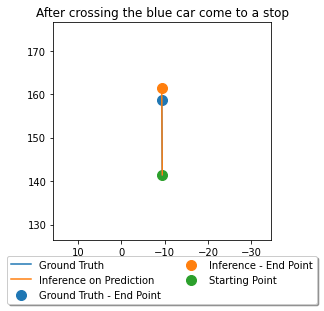

Episode 12: Drive straight till the intersection and then turn left
Frechet Distance: 212.33916789385594
Euclidean Distance between End Points: 212.33916789385597


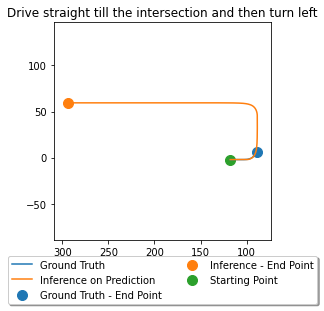

Episode 13: Drive to the corner and go right
Frechet Distance: 7.284234243189723
Euclidean Distance between End Points: 7.284234243189723


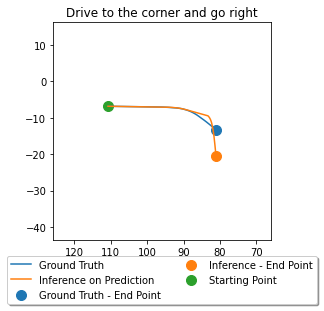

Episode 14: Turn right from the intersection.
Frechet Distance: 8.425640053997611
Euclidean Distance between End Points: 8.425640053997611


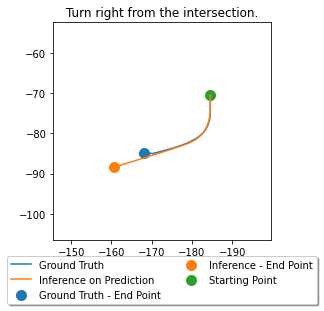

Episode 15: Stop near the red shelters
Frechet Distance: 3.0568580218909256
Euclidean Distance between End Points: 3.0568580218909256


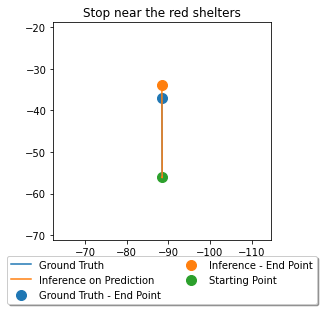

Episode 16: Drive straight till you see a red coloured board
Frechet Distance: 7.241333073812641
Euclidean Distance between End Points: 7.241333073812641


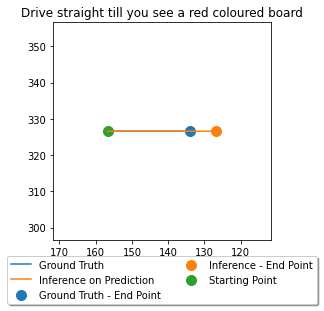

Episode 17: take right and stop near the speed limit sign
Frechet Distance: 12.282180049642605
Euclidean Distance between End Points: 12.282180049642605


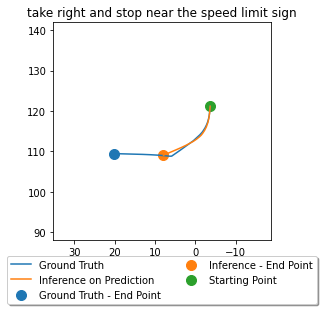

Episode 18: take a right turn and stop across the bench on left
Frechet Distance: 22.17168104788207
Euclidean Distance between End Points: 22.171681047882068


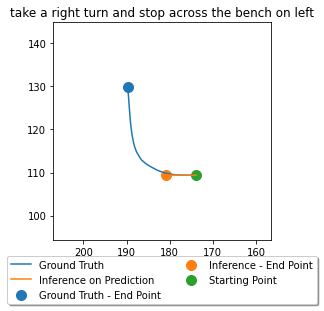

Episode 19: Stop before the next right turn.
Frechet Distance: 20.66114902892529
Euclidean Distance between End Points: 20.66114902892529


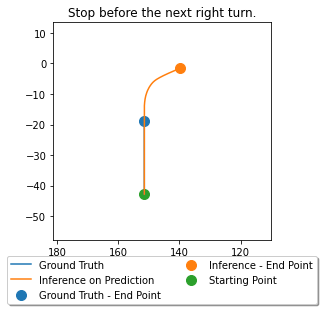

Episode 20: Park just ahead of the speed signboard
Frechet Distance: 6.0435577338959865
Euclidean Distance between End Points: 6.0435577338959865


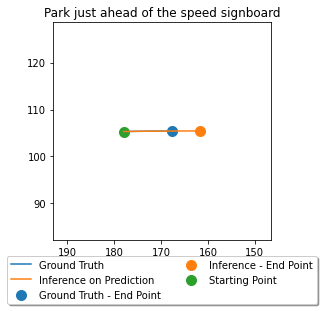

Episode 21: Turn right and stop near the bus stop.
Frechet Distance: 9.601379397928957
Euclidean Distance between End Points: 9.601379397928957


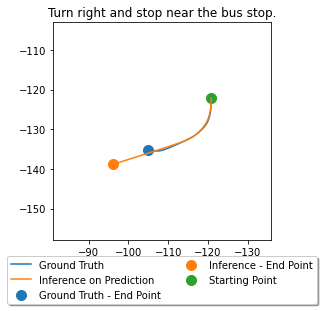

Episode 22: Wait at the traffic light then go straight.
Frechet Distance: 81.68961399386156
Euclidean Distance between End Points: 81.68961399386156


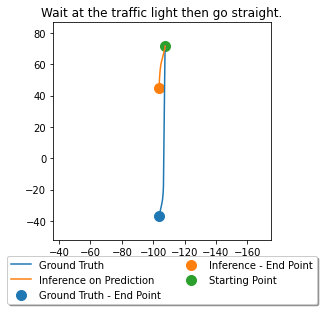

Episode 23: Turn right from the intersection
Frechet Distance: 2.745710896999294
Euclidean Distance between End Points: 2.745710896999294


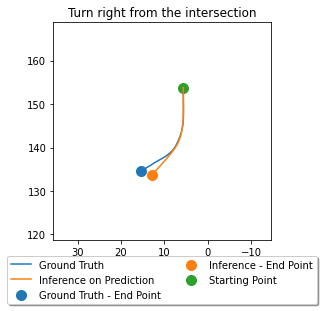

Episode 24: park immediately after the signboard
Frechet Distance: 5.416578033494437
Euclidean Distance between End Points: 5.416578033494437


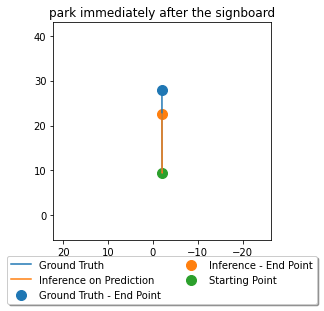

In [112]:
val_data_path = '/ssd_scratch/cvit/varunc/carla_data/val/'
val_run_path = '/ssd_scratch/cvit/varunc/val5_vit/'
save_loc = '../trajectories_vit/'

f_vit,e_vit = get_scores(val_data_path, val_run_path, save_loc)

In [114]:
f_df = pd.DataFrame({'Conv3D':f_conv3d,'VIT':f_vit})
e_df = pd.DataFrame({'Conv3D':e_conv3d,'VIT':e_vit})

In [115]:
min_ef_df = pd.DataFrame(np.dstack([e_df.to_numpy(),f_df.to_numpy()]).min(axis=2),columns=e_df.columns,index=e_df.index)

In [121]:
pd.DataFrame([[f_df.mean(),f_df.std(),f_df.median(),'Freschet'],[e_df.mean(),e_df.std(),e_df.median(),'Euclidean']],columns=['Mean','STD','Median','Name'])

,Mean,STD,Median,Name
0,Conv3D 13.321861 VIT 32.177429 dtype:...,Conv3D 17.272949 VIT 50.577973 dtype:...,Conv3D 8.762909 VIT 9.440486 dtype: f...,Freschet
1,Conv3D 13.321860 VIT 31.643956 dtype:...,Conv3D 17.272949 VIT 49.772926 dtype:...,Conv3D 8.762909 VIT 9.440486 dtype: f...,Euclidean


In [122]:
f_metric = pd.DataFrame([f_df.mean(),f_df.std(),f_df.median()],index=['Mean','STD','Median'])
f_metric['Name'] = 'Freschet'

e_metric = pd.DataFrame([e_df.mean(),e_df.std(),e_df.median()],index=['Mean','STD','Median'])
e_metric['Name'] = 'Euclidean'

In [123]:
joined = pd.concat([f_metric,e_metric])

In [124]:
joined['Type'] = joined.index

In [125]:
joined.set_index(['Name','Type'])

Conv3D        VIT
Name      Type                        
Freschet  Mean    13.321861  32.177429
          STD     17.272949  50.577973
          Median   8.762909   9.440486
Euclidean Mean    13.321860  31.643956
          STD     17.272949  49.772926
          Median   8.762909   9.440486

In [46]:
f_metric,e_metric

(         Conv3D        VIT      Name
 Mean  18.688261  32.177429  Freschet
 STD   22.894029  50.577973  Freschet,
         Conv3D        VIT      Name
 Mean  18.68826  31.643956  Euclidea
 STD   22.89403  49.772926  Euclidea)

In [38]:
pd.MultiIndex.from_arrays([f_metric.index,e_metric.index],label=['freschet','euclidean'])

TypeError: from_arrays() got an unexpected keyword argument 'label'

In [32]:
pd.DataFrame({'df':[f_metric,e_metric],'index':['Freschet','Euclidean']})

,df,index
0,Conv3D VIT Mean 18.688261 32...,Freschet
1,Conv3D VIT Mean 18.68826 31.6...,Euclidean


Text(0.5, 1.0, 'Freschet Distance')

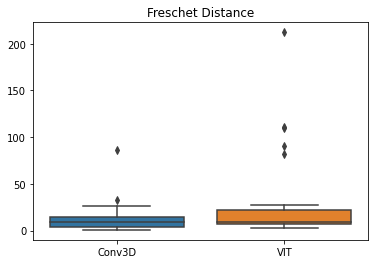

In [132]:
g = sns.boxplot(data=f_df)
# g.set_yscale("log")
# g.set_ylim([-5,60])
plt.title('Freschet Distance')

Text(0.5, 1.0, 'Euclidean Distance Between End Points')

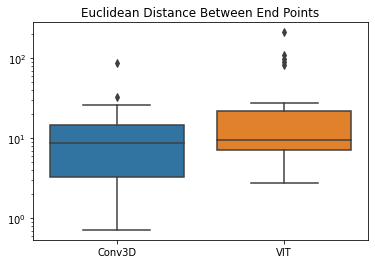

In [127]:
g = sns.boxplot(data=e_df)
g.set_yscale("log")
plt.title('Euclidean Distance Between End Points')

Text(0.5, 1.0, 'Min(Freschet Distance,Euclidean Distance)')

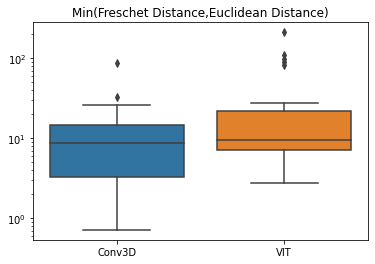

In [128]:
g = sns.boxplot(data=min_ef_df)
g.set_yscale("log")
plt.title('Min(Freschet Distance,Euclidean Distance)')